In [36]:
import os
import pickle

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

In [37]:
sns.set(rc = {'figure.figsize':(10, 8)})

In [5]:
def evaluation_model(y_pred, y_test):
  acc = accuracy_score(y_test, y_pred)
  print("- Acc = {}".format(acc))
  # print(classification_report(y_test, y_pred, target_names=['An sinh', 'Bất động sản', 'Giáo dục',
  #                                                           'Giải trí', 'Kinh doanh', 'Pháp luật',
  #                                                           'Sức khỏe', 'Sức mạnh số', 'Thế giới',
  #                                                           'Thể thao', 'Việc làm', 'Văn hóa', 'Xe ++',
  #                                                           'Xã hội']))
  return acc

In [6]:
DATA_PATH = 'data/'
MODEL_PATH = 'model/'

In [7]:
with open(os.path.join(MODEL_PATH, 'X_test_cleaner_and_reduction_.pkl'), 'rb') as f:
  X_test_cleaner_and_reduction_ = pickle.load(f)

with open(os.path.join(MODEL_PATH, 'y_test.pkl'), 'rb') as f:
  y_test = pickle.load(f)

In [8]:
def read_model_and_results(type: str=None):
  with open(os.path.join(MODEL_PATH, f'{type}_clf.pkl'), 'rb') as f:
    clf = pickle.load(f)

  with open(os.path.join(MODEL_PATH, f'{type}_cv.pkl'), 'rb') as f:
    cv = pickle.load(f)
  return clf, cv

In [9]:
def create_df(cv):
  return pd.DataFrame({
      f'test_score': cv['test_score'],
      f'train_score': cv['train_score']
  })

In [10]:
def create_plot(data, title):
  columns = data.columns
  sns.lineplot(data=data[columns])
  plt.xlabel('k')
  plt.ylabel('score')
  plt.title(title)
  plt.tight_layout()
  plt.show()

In [11]:
svm_clf, svm_cv = read_model_and_results('svm')

svm_cv

{'fit_time': array([41.86297297, 40.88232112, 43.32719898, 43.11398554, 21.84728074]),
 'score_time': array([20.48474741, 19.5894537 , 18.63891554, 18.20498323, 10.92738891]),
 'test_score': array([0.88715084, 0.90446927, 0.88659218, 0.9       , 0.8882057 ]),
 'train_score': array([0.97779019, 0.97429809, 0.97890767, 0.97639335, 0.975     ])}

In [12]:
gnb_clf, gnb_cv = read_model_and_results('gnb')

gnb_cv

{'fit_time': array([0.50008678, 0.37894511, 0.22548151, 0.27941775, 0.20188951]),
 'score_time': array([0.52389145, 0.5381217 , 0.44593024, 0.53379607, 0.26884007]),
 'test_score': array([0.74134078, 0.75977654, 0.76759777, 0.77541899, 0.77808832]),
 'train_score': array([0.81463892, 0.80751502, 0.81882945, 0.8129627 , 0.81201117])}

In [13]:
boosting_gnb_clf, boosting_gnb_cv = read_model_and_results('boosting_gnb')

boosting_gnb_cv

{'fit_time': array([21.89987946, 22.0095458 , 23.10362768, 22.41322684, 13.04479313]),
 'score_time': array([4.15313363, 4.39867711, 5.70718431, 6.05339408, 2.74442601]),
 'test_score': array([0.83743017, 0.81340782, 0.83743017, 0.81452514, 0.82615987]),
 'train_score': array([0.89300182, 0.89705266, 0.89272245, 0.89565582, 0.89064246])}

In [14]:
gnb_df = create_df(gnb_cv)
boosting_gnb_df = create_df(boosting_gnb_cv)

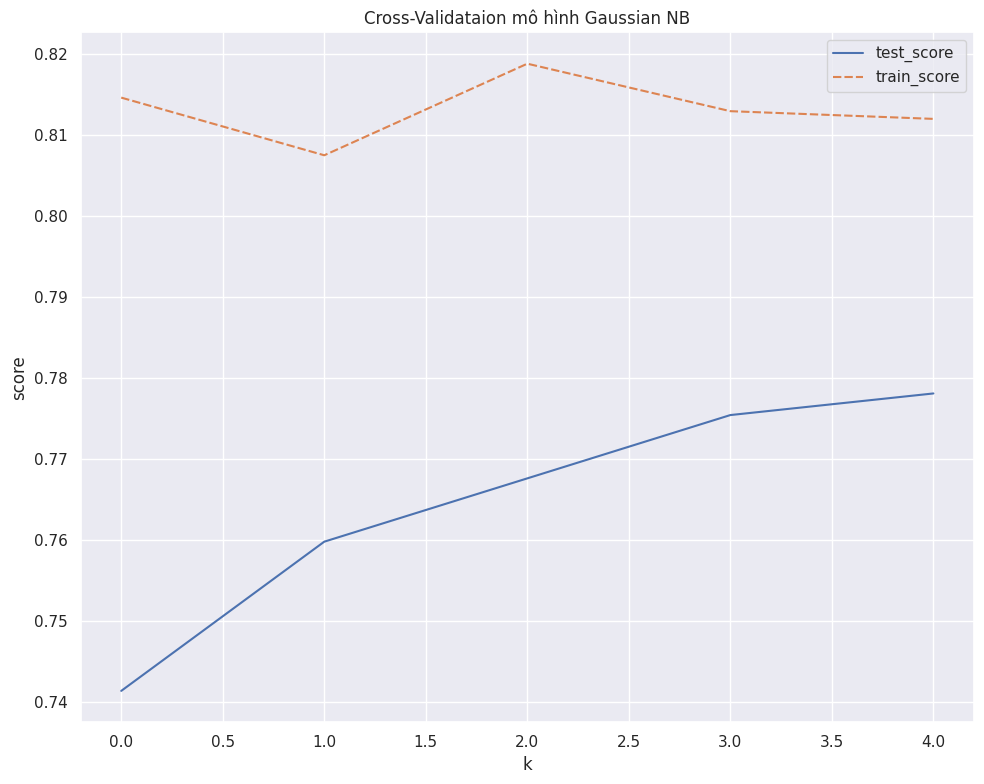

In [15]:
create_plot(gnb_df, 'Cross-Validataion mô hình Gaussian NB')

In [16]:
boosting_gnb_df

,test_score,train_score
0,0.837430,0.893002
1,0.813408,0.897053
2,0.837430,0.892722
3,0.814525,0.895656
4,0.826160,0.890642


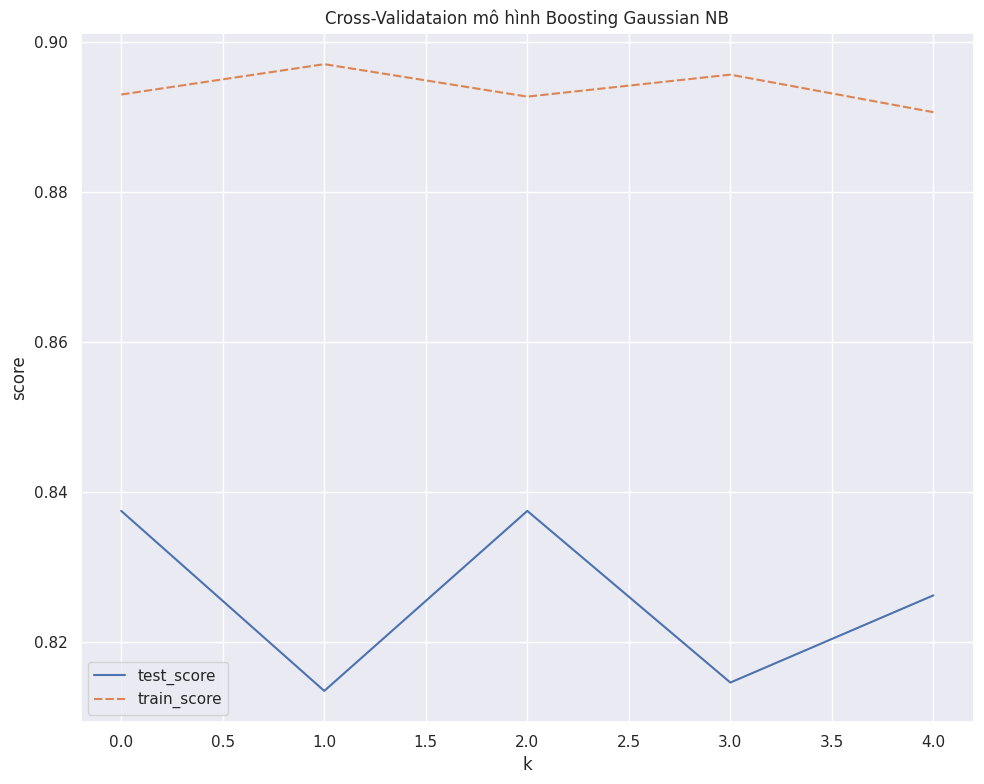

In [17]:
create_plot(boosting_gnb_df, 'Cross-Validataion mô hình Boosting Gaussian NB')


In [18]:
knn_clf, knn_cv = read_model_and_results('knn')

knn_cv

{'fit_time': array([0.05297875, 0.0990963 , 0.04676151, 0.04183412, 0.04351068]),
 'score_time': array([3.17313266, 2.61071801, 1.7945025 , 1.76453161, 1.66693091]),
 'test_score': array([0.82234637, 0.8424581 , 0.85027933, 0.84581006, 0.84851873]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [19]:
gnb_cv

{'fit_time': array([0.50008678, 0.37894511, 0.22548151, 0.27941775, 0.20188951]),
 'score_time': array([0.52389145, 0.5381217 , 0.44593024, 0.53379607, 0.26884007]),
 'test_score': array([0.74134078, 0.75977654, 0.76759777, 0.77541899, 0.77808832]),
 'train_score': array([0.81463892, 0.80751502, 0.81882945, 0.8129627 , 0.81201117])}

In [22]:
time_ = [np.mean(knn_cv['fit_time']), np.mean(gnb_cv['fit_time']), np.mean(knn_cv['score_time']), np.mean(gnb_cv['score_time'])]

time_df = pd.DataFrame({
    'model': ['KNN', 'GNB', 'KNN', 'GNB'],
    'time': time_,
    'type': ['fit_time', 'fit_time', 'score_time', 'score_time']
})

time_df

,model,time,type
0,KNN,0.056836,fit_time
1,GNB,0.317164,fit_time
2,KNN,2.201963,score_time
3,GNB,0.462116,score_time


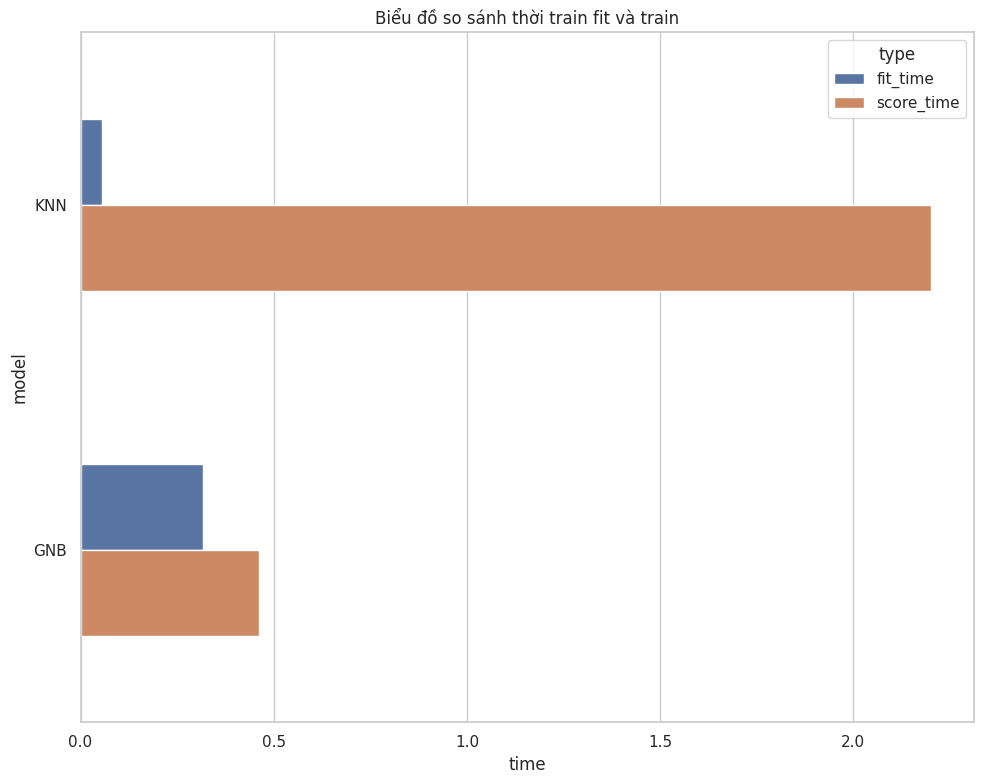

In [32]:
sns.set_theme(style="whitegrid")

sns.barplot(time_df, x="time", y="model", hue="type", width=0.5, fill=True, orient = 'h')
plt.title('Biểu đồ so sánh thời train fit và train')
plt.ylabel('model')
plt.xlabel('time')
plt.tight_layout()
plt.show()

In [33]:
dtc_clf, dtc_cv = read_model_and_results('dt')

dtc_cv

{'fit_time': array([23.99919796, 23.61730361, 29.14699554, 29.11991501, 16.02168036]),
 'score_time': array([0.00747681, 0.01085019, 0.00615382, 0.00597453, 0.00436068]),
 'test_score': array([0.71843575, 0.69944134, 0.72011173, 0.71117318, 0.73672443]),
 'train_score': array([0.9857522 , 0.97024724, 0.95138986, 0.97024724, 0.98282123])}

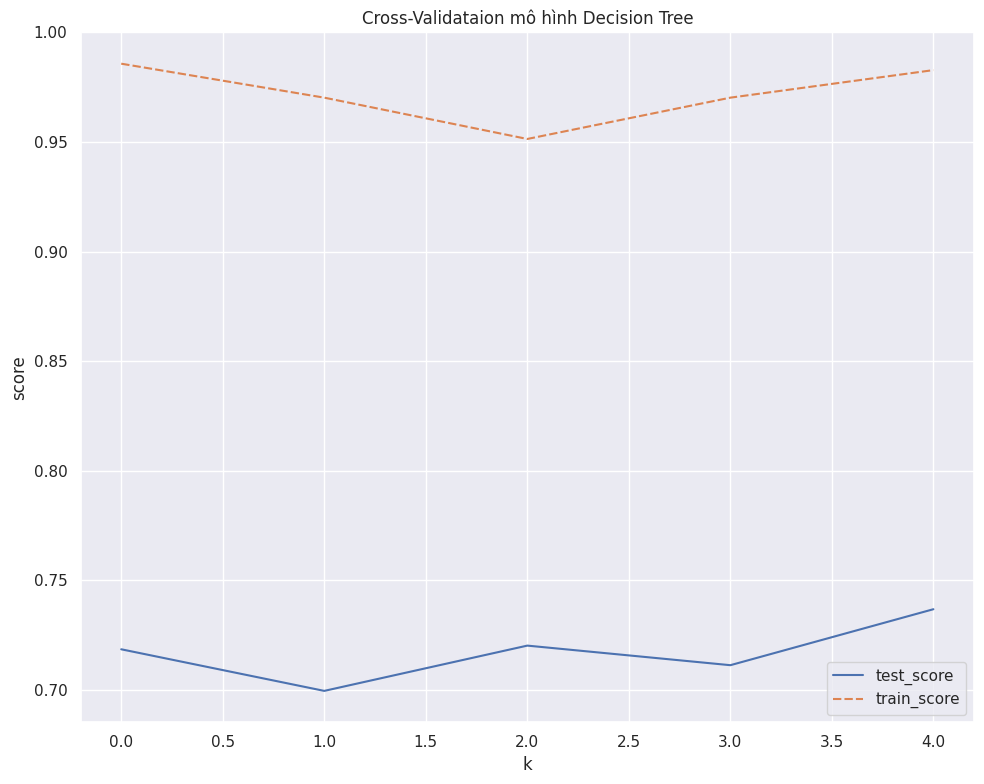

In [39]:
dtc_df = create_df(dtc_cv)
create_plot(dtc_df, 'Cross-Validataion mô hình Decision Tree')

In [34]:
rf_clf, rf_cv = read_model_and_results('rf')

rf_cv

{'fit_time': array([277.13602948, 277.91846108, 271.82812595, 271.77588105,
        136.82453799]),
 'score_time': array([1.11488175, 1.04678774, 0.72728181, 0.64651084, 0.30659127]),
 'test_score': array([0.85810056, 0.86368715, 0.87206704, 0.87653631, 0.86752376]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [40]:
mean_test_score_dtc = np.mean(dtc_cv['test_score'])
mean_test_score_rf = np.mean(rf_cv['test_score'])
mean_train_score_dtc = np.mean(dtc_cv['train_score'])
mean_train_score_rf = np.mean(rf_cv['train_score'])

In [41]:
rf_dtc_df = pd.DataFrame(np.array([
    [mean_train_score_dtc], [mean_test_score_dtc], [mean_train_score_rf], [mean_test_score_rf]
]))
rf_dtc_df.columns = ['value']

In [42]:
rf_dtc_df['type_model'] = np.array(['Decision Tree', 'Decision Tree', 'Random Forest', 'Random Forest'])
rf_dtc_df['type_value'] = np.array(['mean_train_score', 'mean_test_score', 'mean_train_score', 'mean_test_score'])
rf_dtc_df

,value,type_model,type_value
0,0.972092,Decision Tree,mean_train_score
1,0.717177,Decision Tree,mean_test_score
2,1.000000,Random Forest,mean_train_score
3,0.867583,Random Forest,mean_test_score


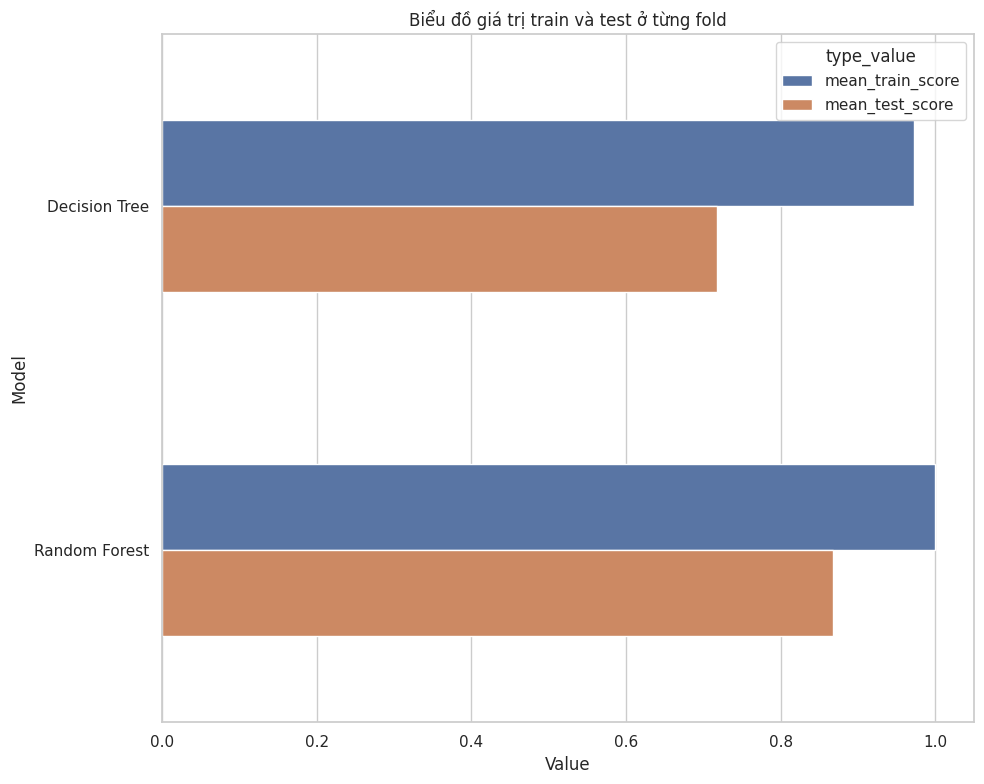

In [45]:
sns.set_theme(style="whitegrid")

sns.barplot(rf_dtc_df, x="value", y="type_model", hue="type_value", width=0.5, fill=True, orient='h')
plt.title('Biểu đồ giá trị train và test ở từng fold')
plt.ylabel('Model')
plt.xlabel('Value')
plt.tight_layout()
plt.show()

In [57]:
gnb_fit_time = np.mean(gnb_cv['fit_time'])
gnb_score_time = np.mean(gnb_cv['score_time'])
gnb_test_score = np.mean(gnb_cv['test_score'])
knn_fit_time = np.mean(knn_cv['fit_time'])
knn_score_time = np.mean(knn_cv['score_time'])
knn_test_score = np.mean(knn_cv['test_score'])
rf_fit_time = np.mean(rf_cv['fit_time'])
rf_score_time = np.mean(rf_cv['score_time'])
rf_test_score = np.mean(rf_cv['test_score'])
dtc_fit_time = np.mean(dtc_cv['fit_time'])
dtc_score_time = np.mean(dtc_cv['score_time'])
dtc_test_score = np.mean(dtc_cv['test_score'])
svm_fit_time = np.mean(svm_cv['fit_time'])
svm_score_time = np.mean(svm_cv['score_time'])
svm_test_score = np.mean(svm_cv['test_score'])

In [59]:
fit_time = np.array([gnb_fit_time, knn_fit_time, rf_fit_time, dtc_fit_time, svm_fit_time])
score_time = np.array([gnb_score_time, knn_score_time, rf_score_time, dtc_score_time, svm_score_time])
test_score = np.array([gnb_test_score, knn_test_score, rf_test_score, dtc_test_score, svm_test_score])
models = np.array(['GNB', 'KNN', 'RF', 'DTC', 'SVM'])

pd.DataFrame({
    'model': models,
    'fit_time': np.round(fit_time, 2),
    'score_time': np.round(score_time, 2),
    'test_score': np.round(test_score, 2)
})


,model,fit_time,score_time,test_score
0,GNB,0.32,0.46,0.76
1,KNN,0.06,2.20,0.84
2,RF,247.10,0.77,0.87
3,DTC,24.38,0.01,0.72
4,SVM,38.21,17.57,0.89
